In [33]:
import numpy as np

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [2]:
# Architecture du réseau
model = Sequential()

# Couches de neurones
model.add(Dense(3, input_dim=2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

/home/savoyarde/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-19 08:21:13.784924: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

## On définie les valeurs des couches (poids, biais)

In [4]:
# Couche 0
coeff = np.array(
    [
        [1., 3., -5], 
        [2., -4., -6]
    ]
)
bias = np.array([-1, 0, 1.])
weights = [coeff, bias]

model.layers[0].set_weights(weights)

# Couche 1
coeff = np.array([[1.0], [1.0], [1.0]])
bias = np.array([-3])
weights = [coeff, bias]

model.layers[1].set_weights(weights)

In [5]:
# Poids de la couche 1 - et 2 [coefficients, biais]

poidscouche1 = model.layers[0].get_weights()
poidscouche2 = model.layers[1].get_weights()

print(poidscouche1)
print(poidscouche2)

[array([[ 1.,  3., -5.],
       [ 2., -4., -6.]], dtype=float32), array([-1.,  0.,  1.], dtype=float32)]
[array([[1.],
       [1.],
       [1.]], dtype=float32), array([-3.], dtype=float32)]


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


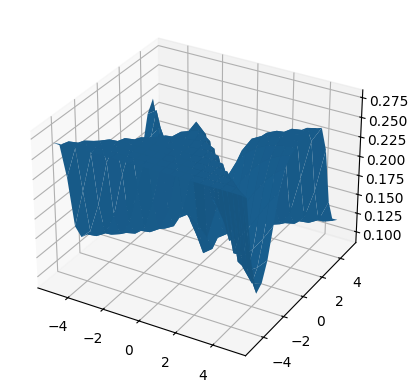

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

VX = np.linspace(-5, 5, 20)
VY = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(VX, VY)
entry = np.c_[X.ravel(), Y.ravel()]

sortie = model.predict(entry)
Z = sortie.reshape(X.shape)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)
plt.show()

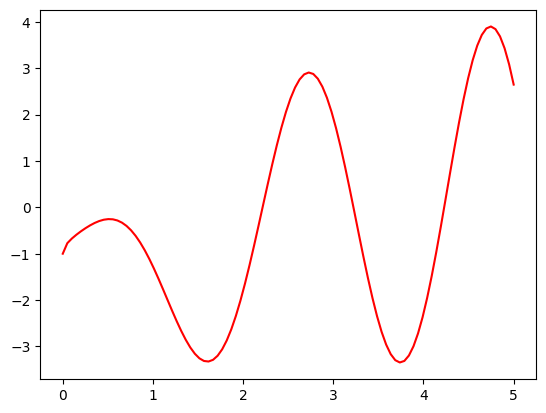

In [22]:
# Partie A. Données

def f(x):
  return np.cos(2*x) + x*np.sin(3*x) + x**0.5 - 2

a, b = 0, 5 
N = 100
X = np.linspace(a, b, N)
Y = f(X)
X_train = X.reshape(-1,1)
Y_train = Y.reshape(-1,1)

plt.plot(X, Y, 'r')

In [25]:
# Partie B. Réseau

model = Sequential()

p = 10
model.add(Dense(p, input_dim=1, activation='tanh'))
model.add(Dense(p, activation='tanh'))
model.add(Dense(p, activation='tanh'))
model.add(Dense(p, activation='tanh'))
model.add(Dense(1, activation='linear'))

/home/savoyarde/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# Méthode de gradient : descente de gradient classique

model.compile(loss='mean_squared_error')
print(model.summary())

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 361 (1.41 KB)

 Trainable params: 361 (1.41 KB)

 Non-trainable params: 0 (0.00 B)

None


In [28]:
# Partie C. Apprentissage

# On initialise d'abord les poids aléatoirement (car nous voulons faire plusieurs
#essais d'apprentissage en repartant de zero à chaque fois) :

random_weights = [np.random.normal(size=w.shape) for w in model.get_weights()]
model.set_weights(random_weights)

# On lance l'apprentissage (par descente de gradient)
history = model.fit(X_train, Y_train, epochs=500)

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.7729 
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.0921
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.2939
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.4673
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.0824
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.1060
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.4295
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.4060
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.4180
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.3128
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.2473
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8499
Epoch 13/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.7015
Epoch 14/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.6457
Epoch 15/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8182
Epoch 16/500
4/4 ━━━━━━━━━━━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


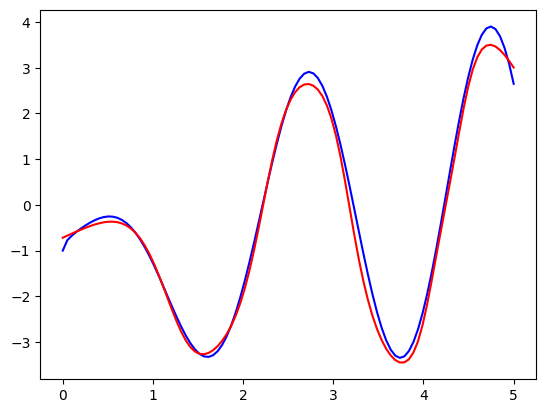

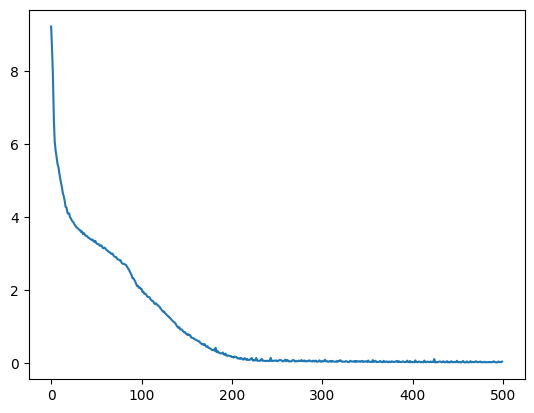

In [29]:
# Partie D. Visualisation

# Affichage de la fonction et de son approximation
Y_predict = model.predict(X_train)

plt.plot(X_train, Y_train, color='blue')
plt.plot(X_train, Y_predict, color='red')
plt.show()

# Affichage de l'erreur au fil des époques
plt.plot(history.history['loss'])
plt.show()

> 1. Exprimez, en fonction des paramètres pertinents, le nombre total de neurones utilisés et le nombre de
paramètres à estimer par la descente de gradient.

41 neurones sont utilisés, avec 361 paramères à estimer

> 2. Quelle est la différence entre Y_train et Y_predict ?

Y_train est la valeur réelle, Y_predict est la valeur prédite par le réseau de neurones après entrainement (descentes de gradient)

> 3. Que trace plt.plot(X_train, Y_train, color='blue') ?

Cela trace la courbe de la fonction `f(x)` réelle en bleu

> 4. Quelle est la fonction python qui effectue la descente de gradient ?

La fonction `fit` de l'objet `model` effectue la descente de gradient, avec les paramètres `X_train` et `Y_train` et le nombre d'itérations `ep`.

> 5. Vous ferez varier les paramètres de la façon suivante, en traçant à chaque fois la vrai fonction et celle
obtenue par le réseau. Décrivez ce que vous obtenez dans chacun des cas (pour des ep grands attention les
temps d’execution peuvent être long dans ce cas n’allez pas jusqu’à 4000, vous pourrez ajouter une fonction
timer qui permet de connaître ce temps d’execution).

* c = 2, p = 2, δ = 0.01, ep = 50 puis ep = 1000 et ep = 4000
* c = 5, p = 2, δ = 0.01, ep = 50 puis ep = 1000 et ep = 4000
* c = 2, p = 5, δ = 0.01, ep = 50 puis ep = 1000 et ep = 4000
* c = 5, p = 5, δ = 0.01, ep = 50 puis ep = 1000 et ep = 4000
* c = 5, p = 10, δ = 0.01, ep = 50 puis ep = 1000 et ep = 4000
* c = 5, p = 10, δ = 0.001, ep = 50 puis ep = 1000 et ep = 4000



In [30]:
import time

Epoch 1/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 16.3161
Epoch 2/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.9429 
Epoch 3/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.5802 
Epoch 4/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.6606 
Epoch 5/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.6316
Epoch 6/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.4005 
Epoch 7/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4946 
Epoch 8/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.1774 
Epoch 9/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.1623 
Epoch 10/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.7837
Epoch 11/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.1741 
Epoch 12/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.2375
Epoch 13/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.9172
Epoch 14/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.1345 
Epoch 15/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4621 
Epoch 16/300
2/2 ━━━━━━

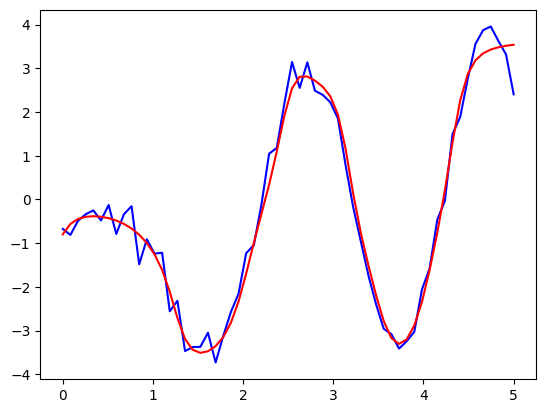

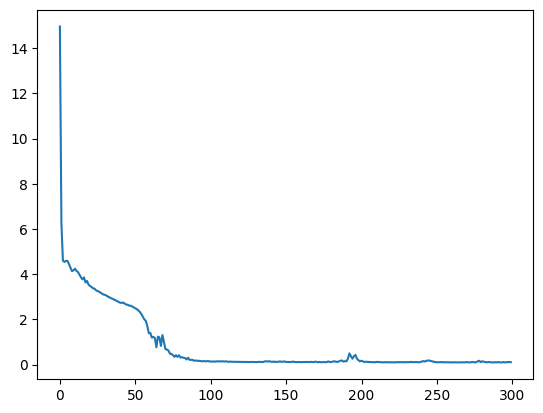

In [50]:
c = 4
p = 10
lr = 0.01
ep = 300

def train(c, p, lr, ep):
  model = Sequential()

  model.add(Dense(p, input_dim=1, activation='tanh'))
  for _ in range(c):
    model.add(Dense(p, activation='tanh'))
  model.add(Dense(1, activation='linear'))

  model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=lr))

  random_weights = [np.random.normal(size=w.shape) for w in model.get_weights()]
  model.set_weights(random_weights)

  start = time.time()
  # On lance l'apprentissage (par descente de gradient)
  history = model.fit(X_train, Y_train, epochs=ep)
  end = time.time()
  print("Temps d'exécution de l'apprentissage : ", end-start)

  # Affichage de la fonction et de son approximation
  Y_predict = model.predict(X_train)

  plt.plot(X_train, Y_train, color='blue')
  plt.plot(X_train, Y_predict, color='red')
  plt.show()

  # Affichage de l'erreur au fil des époques
  plt.plot(history.history['loss'])
  plt.show()

train(c, p, lr, ep)

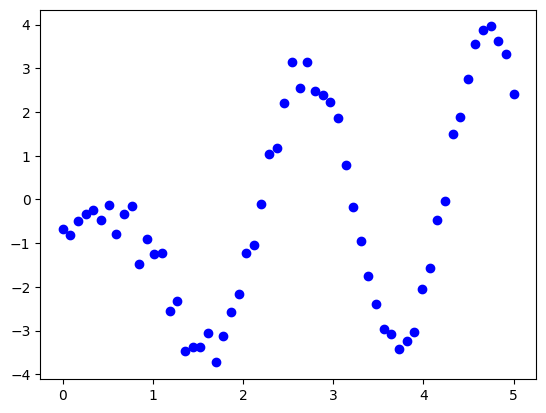

In [49]:
#Voici la fonction qui génère une liste de "size" valeurs selon une loi gaussienne de paramètres "mu" et "sigma" :
def gaussnoise(mu, sigma, size):
  return np.random.normal(mu, sigma, size)

# Création du jeu de données
a, b = 0, 5
N = 60
X = np.linspace(a, b, N)
#print(X)

Y = f(X)
Ynoisy=f(X)+gaussnoise(0,0.3,N)
#print(Y)

X_train = X.reshape(-1,1)
Y_train = Ynoisy.reshape(-1,1)
# Tracer du nuage de points des données bruitées color='blue'

plt.plot(X_train, Y_train,"ob")

Epoch 1/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 10.5313
Epoch 2/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.3132
Epoch 3/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.2248
Epoch 4/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.8238
Epoch 5/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5761
Epoch 6/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4737
Epoch 7/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.7100
Epoch 8/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.6967
Epoch 9/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.3634 
Epoch 10/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8430
Epoch 11/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4468
Epoch 12/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.3176 
Epoch 13/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.3363 
Epoch 14/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.5545 
Epoch 15/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4344
Epoch 16/300
2/2 ━━━━━━━━━━━━

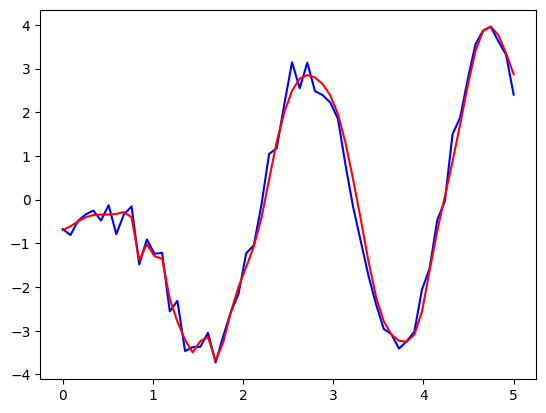

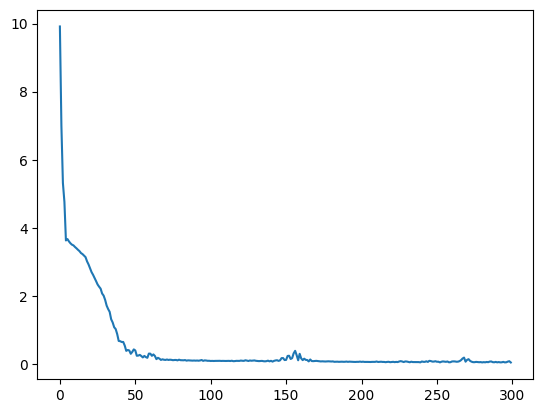

In [51]:
c = 4
p = 10
lr = 0.01
ep = 300

def train(c, p, lr, ep):
  model = Sequential()

  model.add(Dense(p, input_dim=1, activation='tanh'))
  for _ in range(c):
    model.add(Dense(p, activation='tanh'))
  model.add(Dense(1, activation='linear'))

  model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=lr))

  random_weights = [np.random.normal(size=w.shape) for w in model.get_weights()]
  model.set_weights(random_weights)

  start = time.time()
  # On lance l'apprentissage (par descente de gradient)
  history = model.fit(X_train, Y_train, epochs=ep)
  end = time.time()
  print("Temps d'exécution de l'apprentissage : ", end-start)

  # Affichage de la fonction et de son approximation
  Y_predict = model.predict(X_train)

  plt.plot(X_train, Y_train, color='blue')
  plt.plot(X_train, Y_predict, color='red')
  plt.show()

  # Affichage de l'erreur au fil des époques
  plt.plot(history.history['loss'])
  plt.show()

train(c, p, lr, ep)